Mamadou Billo Diallo & Alpha Macky Daff

#Detection d'Anomalies

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/MetroPT3(AirCompressor).csv')

In [ ]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
# Transformation de l'index pandas avec la colonne "timestamp"
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.set_index('timestamp', inplace=True)

In [ ]:
# Transformer le type des colonnes booléennes à bool
bool_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
condition = df[bool_columns] != 0.0
df[bool_columns] = condition.astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  bool   
 8   DV_eletric       1516948 non-null  bool   
 9   Towers           1516948 non-null  bool   
 10  MPG              1516948 non-null  bool   
 11  LPS              1516948 non-null  bool   
 12  Pressure_switch  1516948 non-null  bool   
 13  Oil_level        1516948 non-null  bool   
 14  Caudal_impulses  1516948 non-null  bool   
dtypes: bool(8), float64(7)
memory usa

In [ ]:
# Mettre à l'échelle les colonnes sous une échelle [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.index = df.index
df_scaled

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0.001868,0.901379,0.908175,0.000810,0.901752,0.518669,0.002156,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,0.001681,0.900334,0.907400,0.001013,0.900709,0.519688,0.002156,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,0.001868,0.899290,0.906432,0.001013,0.899666,0.518669,0.002426,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,0.001868,0.898245,0.905463,0.001013,0.898623,0.516293,0.002156,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,0.001868,0.897200,0.904494,0.001013,0.897580,0.516972,0.002156,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,0.001681,0.855412,0.866137,0.001013,0.855861,0.601154,0.002426,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,0.001681,0.853949,0.864394,0.001215,0.854401,0.600136,0.002695,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,0.001681,0.852486,0.863231,0.001013,0.853150,0.600136,0.002426,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


#MODÈLE BATCH

on va utilisé une analyse par grid search pour savoir quel pourcentage de conatmination des données notre modèle detecte: on va faire pour 0.01, 0.02, 0.03


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres pour tester diverses combinaisons
param_grid = {
    'contamination': [0.01, 0.02, 0.03],  # Nombre d'arbres dans la forêt
}

# Initialisation du Grid Search avec IsolationForest et la grille de paramètres
grid_search = GridSearchCV(
    estimator=IsolationForest(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, # Nombre de validations croisées
    n_jobs=-1
)

# appliquons sur nos données
grid_search.fit(df_scaled)

# Extraction des meilleurs paramètres trouvés par la recherche
best_params = grid_search.best_params_

print("Meilleurs paramètres :", best_params)
#liens de références : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Meilleurs paramètres : {'contamination': 0.01}


alors 0.01 est notre pourcentage d'anomalie détectéé

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest( contamination=0.01)
clf.fit(df_scaled)

IsolationForest(contamination=0.01)

In [ ]:
# Prédiction des labels (normaux ou anomalies)
y_pred = clf.predict(df_scaled)

In [ ]:
#rajoutons cette prediction sur notre dataset
df['anomaly_batch'] = y_pred

In [ ]:
# Affichons les valeurs uniques de notre colonne anomaly batch
df['anomaly_batch'].unique()

array([ 1, -1])

ici on remarque deux valeurs. Ça veut dire que -1 est considéré comme une anomalie detecter.

In [ ]:
# Prédictions du modèle
predictions = y_pred

# Calculer le nombre et la proportion d'anomalies
nombre_anomalies = (predictions == -1).sum()
proportion_anomalies = nombre_anomalies / len(predictions)
print(f"taille: {len(predictions)}")
print(f"Nombre d'anomalies détectées : {nombre_anomalies}")
print(f"Proportion d'anomalies détectées : {proportion_anomalies:.2%}")


taille: 1516948
Nombre d'anomalies détectées : 15170
Proportion d'anomalies détectées : 1.00%


on remarque qu'on a pour un total de 1516948 lignes 15170 anomalies dtectées donc ceci represente 1%




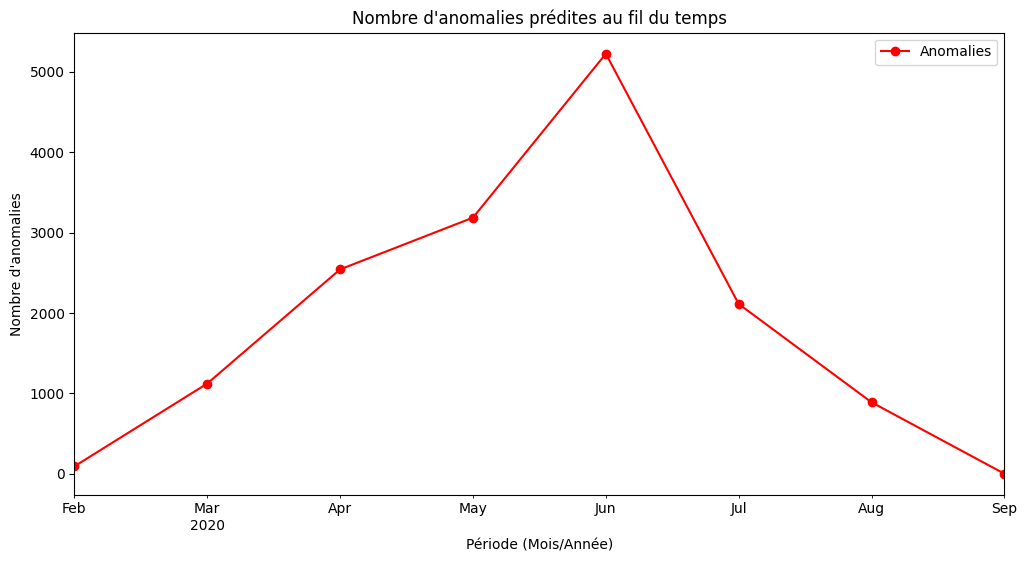

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Compter le nombre d'anomalies par mois (ou par année si nécessaire)
df['date'] = pd.to_datetime(df.index)  # Assure-toi que l'index est au format datetime
df['year_month'] = df['date'].dt.to_period('M')  # Changer 'M' en 'Y' pour des données annuelles
anomalies_over_time = df[df['anomaly_batch'] == -1].groupby('year_month').size()

# Tracer les anomalies au fil du temps
plt.figure(figsize=(12, 6))
anomalies_over_time.plot(kind='line', marker='o', color='red', label='Anomalies')
plt.title("Nombre d'anomalies prédites au fil du temps")
plt.xlabel("Période (Mois/Année)")
plt.ylabel("Nombre d'anomalies")
plt.legend()
plt.xticks(rotation=45)
plt.show()


une observation des anomalies par mois

In [ ]:
df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,anomaly_batch,date,year_month
timestamp,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,True,False,True,True,False,True,True,True,1,2020-02-01 00:00:00,2020-02
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,True,False,True,True,False,True,True,True,1,2020-02-01 00:00:10,2020-02
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,True,False,True,True,False,True,True,True,1,2020-02-01 00:00:19,2020-02
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,True,False,True,True,False,True,True,True,1,2020-02-01 00:00:29,2020-02
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,True,False,True,True,False,True,True,True,1,2020-02-01 00:00:39,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,True,False,True,True,False,True,True,True,1,2020-09-01 03:59:10,2020-09
2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,True,False,True,True,False,True,True,True,1,2020-09-01 03:59:20,2020-09
2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,True,False,True,True,False,True,True,True,1,2020-09-01 03:59:30,2020-09


# MODÈLE STREAM

In [ ]:
!pip install river

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import calendar
import datetime
from river import anomaly
from river import stream

In [ ]:
from river import anomaly
anomaly_scores = []
# Entraînement du modèle HalfSpaceTrees en streaming
model_streaming = anomaly.HalfSpaceTrees()
data_stream = stream.iter_pandas(X=df_scaled, y=None)
for i, (X, _) in enumerate(data_stream):
    model = model_streaming.learn_one(X)
#liens de références: https://riverml.xyz/dev/api/anomaly/HalfSpaceTrees/

on a consdiéré les parmètre de base

In [ ]:
df['anomaly_streaming'].unique()

nos valeurs sont comprise ente 0 et 1.
plus les valeurs sont proche de 1 plus ils sont considérés comme des outilsers.

In [ ]:
df['anomaly_streaming'] = df_scaled.apply(lambda x: model_streaming.score_one(x), axis=1)

In [ ]:
seuil_anomalie = np.quantile(df['anomaly_streaming'], 0.99)  # Pour les 1% de valeurs les plus élevées
seuil_anomalie

0.9911264187866927

en utilisant les 99e percetil on essaye de trouvé un seuil d'anomalie résonnable

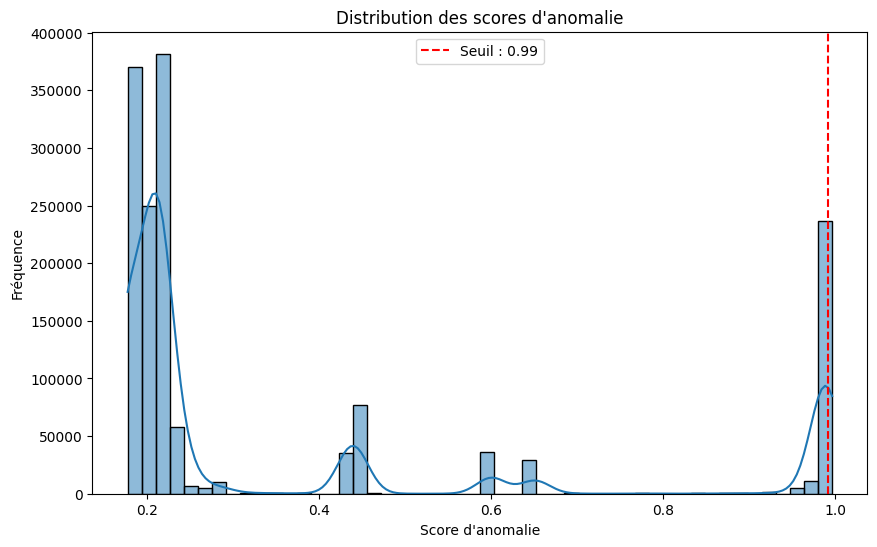

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['anomaly_streaming'], bins=50, kde=True)
plt.axvline(seuil_anomalie, color='red', linestyle='--', label=f'Seuil : {seuil_anomalie:.2f}')
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score d'anomalie")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


une visualisation du scor de l'anomalie

In [ ]:
# Appliquer le seuil pour marquer les anomalies
df['is_anomaly'] = df['anomaly_streaming'] > seuil_anomalie

# Afficher un résumé
nombre_anomalies = df['is_anomaly'].sum()
print(f"Nombre total d'anomalies détectées : {nombre_anomalies}")
print(f"Proportion d'anomalies détectées : {100 * nombre_anomalies / len(df):.2f}%")


Nombre total d'anomalies détectées : 12788
Proportion d'anomalies détectées : 0.84%


dans le modèle batch en considérant 1% de contamination on avais jusqu'à 15 170 outliers détecter dans ce modèle on a 12788
donc notre modèle stream detecte très bien les outliers avec une très bonne précision.